<a href="https://colab.research.google.com/github/SiharaVikashIITD/Data-Analytics/blob/main/GlobalYTStatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1.	What are the top 10 YouTube channels based on the number of subscribers?
2.	Which category has the highest average number of subscribers?
3.	How many videos, on average, are uploaded by YouTube channels in each category?
4.	What are the top 5 countries with the highest number of YouTube channels?
5.	What is the distribution of channel types across different categories?
6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?
7.	How do the monthly earnings vary throughout different categories?
8.	What is the overall trend in subscribers gained in the last 30 days across all channels?
9.	Are there any outliers in terms of yearly earnings from YouTube channels?
10.	What is the distribution of channel creation dates? Is there any trend over time?
11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?
12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?
13.	What is the average urban population percentage in countries with YouTube channels?
14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?
15.	What is the correlation between the number of subscribers and the population of a country?
16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?
17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
18.	How does the distribution of video views for the last 30 days vary across different channel types?
19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?
20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?



In [ ]:
#reading the file with a different encoding, like 'latin-1'
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

In [ ]:
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [ ]:
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
#1. Top 10 YouTube channels based on the number of subscribers
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)
print(top_10_channels[['Youtuber', 'subscribers']])

                     Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [ ]:
#2. Category with the highest average number of subscribers
category_avg_subscribers = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
top_category = category_avg_subscribers.idxmax()
print(f"The category with the highest average subscribers is: {top_category}")

The category with the highest average subscribers is: Shows


In [ ]:
#3. Average number of videos uploaded by YouTube channels in each category
avg_videos_per_category = df.groupby('category')['uploads'].mean()
print(avg_videos_per_category)

category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [ ]:
#4. Top 5 countries with the highest number of YouTube channels
top_5_countries = df['Country'].value_counts().head(5)
print(top_5_countries)

Country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: count, dtype: int64


In [ ]:
#5. Distribution of channel types across different categories
channel_type_distribution = df.groupby(['category', 'channel_type']).size().unstack().fillna(0)
print(channel_type_distribution)

channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles           0.0    2.0     0.0        0.0            1.0   0.0   
Comedy                     0.0    0.0    39.0        0.0           20.0   1.0   
Education                  0.0    0.0     0.0       36.0            3.0   2.0   
Entertainment              0.0    1.0     5.0        2.0          168.0   6.0   
Film & Animation           0.0    0.0     1.0        2.0           16.0  17.0   
Gaming                     0.0    1.0     1.0        0.0           18.0   2.0   
Howto & Style              0.0    0.0     0.0        0.0            7.0   0.0   
Movies                     0.0    0.0     0.0        0.0            0.0   2.0   
Music                      0.0    0.0     0.0        1.0           12.0   5.0   
News & Politics            0.0    0.0     0.0        0.0            3.0   0.0   
Nonprofits & Activism      0

In [ ]:
#6. Correlation between the number of subscribers and total video views
correlation = df['subscribers'].corr(df['video views'])
print(f"Correlation between subscribers and total video views:{correlation}")

Correlation between subscribers and total video views:0.7481786016237689


In [ ]:
#7. Monthly earnings variation across different categories
monthly_earnings_variation = df.groupby('category')['highest_monthly_earnings'].mean()
print(monthly_earnings_variation)

category
Autos & Vehicles         1.190900e+06
Comedy                   6.597635e+05
Education                7.518043e+05
Entertainment            6.293549e+05
Film & Animation         7.489841e+05
Gaming                   2.720201e+05
Howto & Style            1.920441e+05
Movies                   4.547000e+05
Music                    5.535735e+05
News & Politics          6.426320e+05
Nonprofits & Activism    3.904000e+05
People & Blogs           5.357493e+05
Pets & Animals           6.355516e+05
Science & Technology     2.020432e+05
Shows                    2.037662e+06
Sports                   9.813583e+05
Trailers                 3.619000e+05
Travel & Events          1.240000e+05
Name: highest_monthly_earnings, dtype: float64


In [ ]:

monthly_earnings_variation = df.groupby('category')['lowest_monthly_earnings'].mean()
print(monthly_earnings_variation)

category
Autos & Vehicles          74966.666667
Comedy                    41332.285714
Education                 46863.239348
Entertainment             39393.724370
Film & Animation          46802.533556
Gaming                    16965.790316
Howto & Style             12022.350500
Movies                    28400.000000
Music                     34671.696798
News & Politics           40192.625000
Nonprofits & Activism     24400.000000
People & Blogs            33485.993969
Pets & Animals            39980.800000
Science & Technology      12635.411765
Shows                    126961.538462
Sports                    60783.333333
Trailers                  22600.000000
Travel & Events            7800.000000
Name: lowest_monthly_earnings, dtype: float64


In [ ]:
#8. Overall trend in subscribers gained in the last 30 days across all channels
overall_trend_subscribers = df['subscribers_for_last_30_days'].sum()
print(f"Total subscribers gained in the last 30 days: {overall_trend_subscribers}")

Total subscribers gained in the last 30 days: 232794874.0


In [ ]:
#9. Outliers in terms of yearly earnings from YouTube channels
yearly_earnings = df['highest_yearly_earnings']
q1 = yearly_earnings.quantile(0.25)
q3 = yearly_earnings.quantile(0.75)
iqr = q3 - q1
outliers = df[(yearly_earnings < q1 - 1.5 * iqr) | (yearly_earnings > q3 + 1.5 * iqr)]
print(outliers[['Youtuber', 'highest_yearly_earnings']])

                       Youtuber  highest_yearly_earnings
0                      T-Series              108400000.0
2                       MrBeast               64700000.0
3    Cocomelon - Nursery Rhymes               94800000.0
4                     SET India               87500000.0
6           ýýý Kids Diana Show               35100000.0
..                          ...                      ...
908                 Susy Mouriz               17700000.0
970                    _vector_               43400000.0
990               Natan por Aï¿               26500000.0
995                         WWE               34300000.0
999           Infobells - Hindi               39200000.0

[101 rows x 2 columns]


In [ ]:
#11. Relationship between gross tertiary education enrollment and the number of YouTube channels in a country
correlation_education = df.groupby('Country').agg({'Gross tertiary education enrollment (%)': 'mean', 'Youtuber': 'count'}).corr().iloc[0, 1]
print(f"Correlation between gross tertiary education enrollment and number of YouTube channels: {correlation_education}")


Correlation between gross tertiary education enrollment and number of YouTube channels: 0.1121990458668538


In [ ]:
#12. Unemployment rate variation among the top 10 countries with the highest number of YouTube channels
top_10_countries_channels = df['Country'].value_counts().head(10).index
unemployment_variation = df[df['Country'].isin(top_10_countries_channels)].groupby('Country')['Unemployment rate'].mean()
print(unemployment_variation)

Country
Brazil            12.08
India              5.36
Indonesia          4.69
Mexico             3.42
Russia             4.59
South Korea        4.15
Spain             13.96
Thailand           0.75
United Kingdom     3.85
United States     14.70
Name: Unemployment rate, dtype: float64


In [ ]:
#13. Average urban population percentage in countries with YouTube channels
avg_urban_population = df.groupby('Country')['Urban_population'].mean()
print(avg_urban_population)


Country
Afghanistan               9797273.0
Andorra                         NaN
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   115782416.0
Jordan                    9213048.0
Kuwait                    4207083.0
Latvia                    1304943.0
Malaysia                 24475766.0
Mexico              

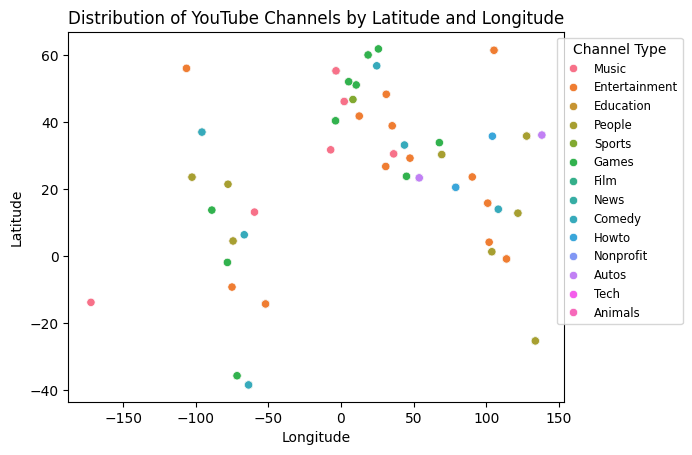

In [ ]:
#14 Patterns in distribution of YouTube channels based on latitude and longitude coordinates
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.scatterplot(x='Longitude', y='Latitude', hue='channel_type', data=df)
plt.title('Distribution of YouTube Channels by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Customize the legend
plt.legend(title='Channel Type', loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='small')
plt.show()

In [ ]:
#15 Correlation between the number of subscribers and the population of a country
correlation_population = df.groupby('Country').agg({'Population': 'mean', 'subscribers': 'sum'}).corr().iloc[0, 1]
print(f"Correlation between the number of subscribers and the population of a country: {correlation_population}")


Correlation between the number of subscribers and the population of a country: 0.3407595325203509


In [ ]:
#16. Comparison of top 10 countries with the highest number of YouTube channels in terms of total population
top_10_countries_channels = df['Country'].value_counts().head(10).index
top_10_countries_pop = df[df['Country'].isin(top_10_countries_channels)].groupby('Country')['Population'].sum()
print(top_10_countries_pop)


Country
Brazil            1.317868e+10
India             2.309246e+11
Indonesia         7.565710e+09
Mexico            4.158463e+09
Russia            2.309977e+09
South Korea       8.790547e+08
Spain             1.035689e+09
Thailand          1.253260e+09
United Kingdom    2.940714e+09
United States     1.033954e+11
Name: Population, dtype: float64


In [ ]:
#17. Correlation between subscribers gained in the last 30 days and unemployment rate
corr_subscribers_unemployment = df.groupby('Country').agg({'subscribers_for_last_30_days': 'sum', 'Unemployment rate': 'mean'}).corr().iloc[0, 1]
print(f"Corr b/w subscribers gained in the last 30 days and unemployment rate: {corr_subscribers_unemployment}")


Corr b/w subscribers gained in the last 30 days and unemployment rate: 0.2104986522914354


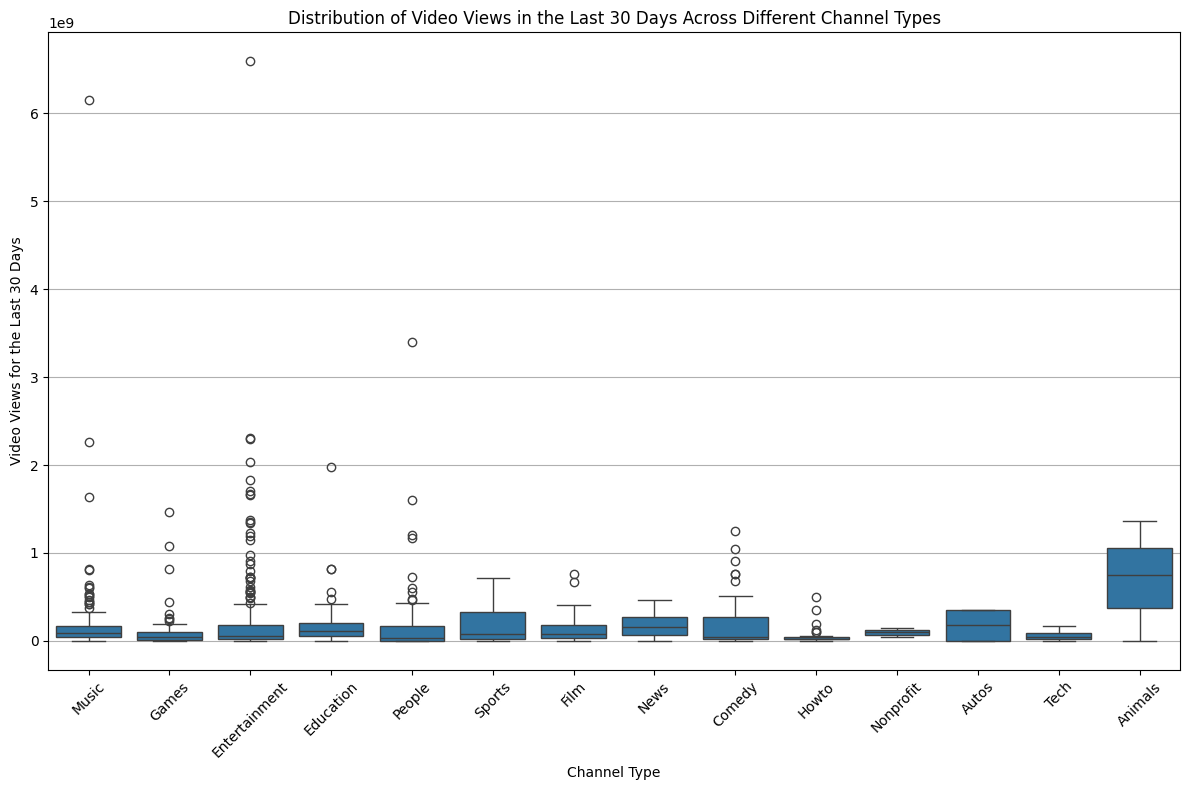

In [ ]:
#18. Distribution of video views in the last 30 days across different channel types

plt.figure(figsize=(12,8))
plt.grid(True)
sns.boxplot(x='channel_type', y='video_views_for_the_last_30_days', data=df)
plt.title('Distribution of Video Views in the Last 30 Days Across Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Video Views for the Last 30 Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Handle missing values in date columns
# Option 1: Drop rows with missing values in any of the date columns
df = df.dropna(subset=['created_year', 'created_month', 'created_date'])

# Option 2: Fill missing values (if dropping is not desired)
# df['created_year'] = df['created_year'].fillna(df['created_year'].median())
# df['created_month'] = df['created_month'].fillna(1)  # Assuming January for missing months
# df['created_date'] = df['created_date'].fillna(1)  # Assuming 1st day of the month for missing days

# Map month names to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['created_month'] = df['created_month'].map(month_mapping)

# Step 3: Convert the year, month, and day columns to integers
df['created_year'] = df['created_year'].astype(int)
df['created_month'] = df['created_month'].astype(int)
df['created_date'] = df['created_date'].astype(int)

# Step 4: Combine year, month, and day into a single date column
df['Creation Date'] = pd.to_datetime(df[['created_year', 'created_month', 'created_date']].rename(columns={
    'created_year': 'year',
    'created_month': 'month',
    'created_date': 'day'
}))


# Step 5: Drop the original date-related columns as they are now redundant
#df = df.drop(columns=['created_year', 'created_month', 'created_date'])

# Display the updated DataFrame with the new Creation Date column
df[['Youtuber', 'Creation Date']].head()


,Youtuber,Creation Date
0,T-Series,2006-03-13
2,MrBeast,2012-02-20
3,Cocomelon - Nursery Rhymes,2006-09-01
4,SET India,2006-09-20
5,Music,2013-09-24


Creation Date
1970      1
2005     24
2006     90
2007     52
2008     46
2009     52
2010     48
2011     82
2012     68
2013     76
2014    100
2015     73
2016     78
2017     67
2018     46
2019     34
2020     29
2021     23
2022      5
Name: count, dtype: int64


Text(0, 0.5, 'Number of Channels')

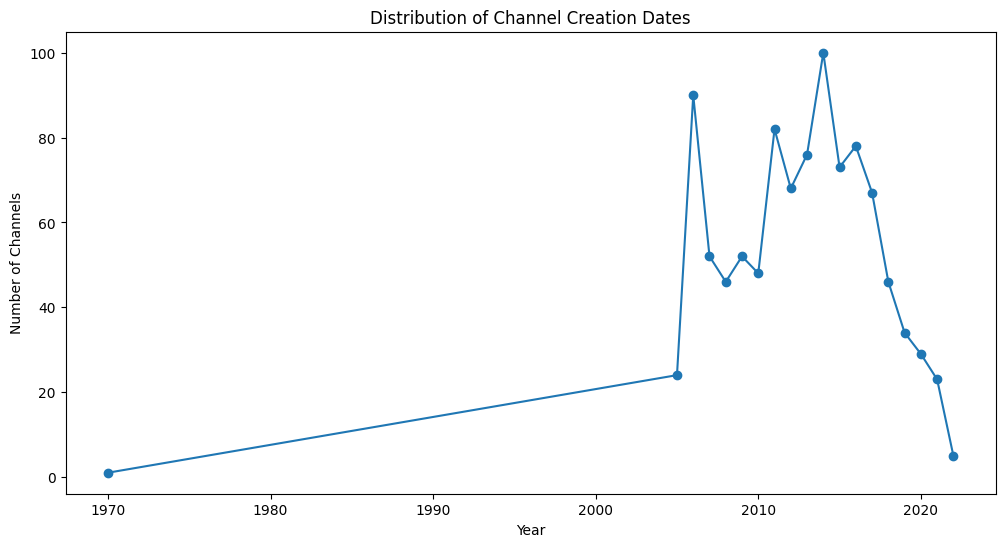

In [ ]:
#10 Distribution of Channel Creation Dates:
creation_trend = df['Creation Date'].dt.year.value_counts().sort_index()
print(creation_trend)
plt.figure(figsize=(12, 6))
plt.plot(creation_trend.index, creation_trend.values, marker='o')
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels')

upload_month
1      809272
2      786083
3      373174
4      177495
5      728341
6      979456
7      498739
8     1320718
9     1181665
10    1301703
11     804584
12     253978
Name: uploads, dtype: int64


Text(0.5, 1.0, 'Seasonal Trends in the Number of Videos Uploaded')

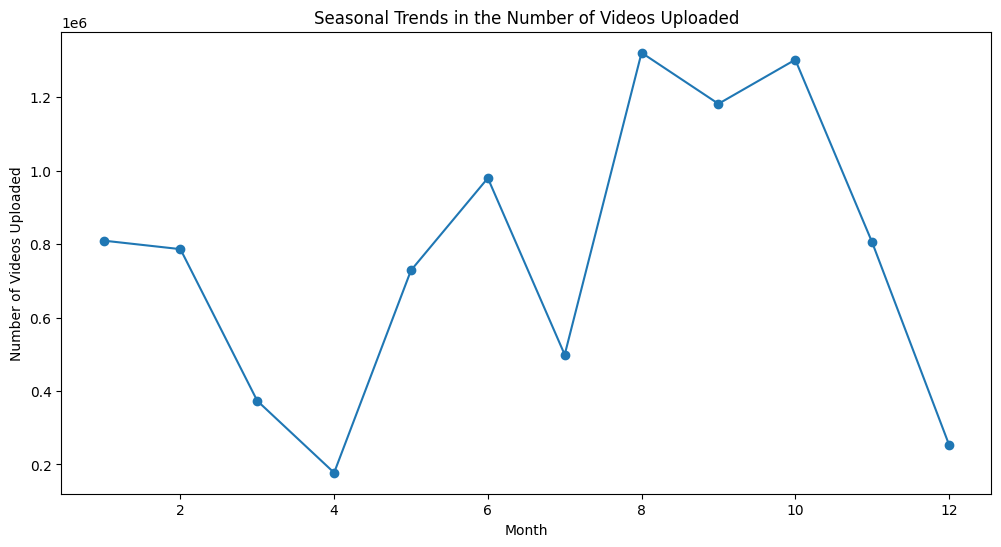

In [ ]:
#19 Seasonal Trends in the Number of Videos Uploaded:
df['upload_month'] = df['Creation Date'].dt.month
monthly_upload_trend = df.groupby('upload_month')['uploads'].sum()
print(monthly_upload_trend)
plt.figure(figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.plot(monthly_upload_trend.index, monthly_upload_trend.values, marker='o')
plt.title('Seasonal Trends in the Number of Videos Uploaded')


In [ ]:
#20 Average Number of Subscribers Gained Per Month:
df['subscribers_per_month'] = df['subscribers'] / ((pd.Timestamp('now') - df['Creation Date']).dt.days / 30)
avg_subscribers_per_month = df['subscribers_per_month'].mean()
print(avg_subscribers_per_month)

191068.32818620518
